<a href="https://colab.research.google.com/github/skyshine460/ProdTaken/blob/main/ProdTaken_lightgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [456]:
train_df = pd.read_csv('/content/drive/MyDrive/Â•ëÁ¥Ñ‰∫àÊ∏¨ÔºàSIGNATE Cup 2024Ôºâ/Êèê‰æõ„ÉÜ„Çô„Éº„Çø/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Â•ëÁ¥Ñ‰∫àÊ∏¨ÔºàSIGNATE Cup 2024Ôºâ/Êèê‰æõ„ÉÜ„Çô„Éº„Çø/test.csv')

# „Éá„Éº„Çø„ÅÆÊï¥ÁêÜ

ÁõÆÁöÑÂ§âÊï∞ÔºöProdTakenÔºàÂïÜÂìÅ„ÅÆÂ•ëÁ¥ÑÁä∂ÊÖã(0:‰∏çÊàêÁ¥Ñ„ÄÅ1:ÊàêÁ¥Ñ)Ôºâ


Ë©ï‰æ°ÊåáÊ®ôÔºöAUC

In [457]:
# ÂêÑ„Ç´„É©„É†„ÅÆ„Éá„Éº„ÇøÂûã„Å®Ê¨†ÊêçÂÄ§ÔºànanÔºâ„ÇíË°®Á§∫
def information_df(df):
    pd.set_option('display.max_rows', None)
    type_series = df.dtypes
    nunique_series = df.nunique()
    nan_count_series = df.isnull().sum()
    unique_values_series = df.apply(lambda col: list(col.unique()))
    info_df = pd.DataFrame({
        'dtypes': type_series,
        'NaN Count': nan_count_series,
        'Nunique': nunique_series,
        'Unique Values': unique_values_series,
    })
    print(f'(index, col) : {df.shape}')
    return info_df

In [458]:
information_df(train_df)

(index, col) : (3489, 18)


dtypes  NaN Count  Nunique  \
id                        int64          0     3489   
Age                      object        100      237   
TypeofContact            object          6        2   
CityTier                  int64          0        3   
DurationOfPitch          object        121       65   
Occupation               object          0        3   
Gender                   object          0       18   
NumberOfPersonVisiting  float64          0        4   
NumberOfFollowups       float64         33       11   
ProductPitched           object          0       76   
PreferredPropertyStar   float64          0        3   
NumberOfTrips            object         22       18   
Passport                  int64          0        2   
PitchSatisfactionScore    int64          0        5   
Designation              object          0       53   
MonthlyIncome            object         56     2542   
customer_info            object          0     1729   
ProdTaken                 int64          0        2   

                                                            Unique Values  
id                      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
Age                     [50Ê≠≥, 56Ê≠≥, nan, ‰∏âÂçÅ‰∏ÉÊ≠≥, 48Ê≠≥, 19Ê≠≥, 47Ê≠≥, 49Ê≠≥, 33Ê≠≥,...  
TypeofContact                        [Self Enquiry, Company Invited, nan]  
CityTier                                                        [2, 1, 3]  
DurationOfPitch         [900Áßí, 14ÂàÜ, 10ÂàÜ, 1080Áßí, 1020Áßí, 16ÂàÜ, 840Áßí, 22ÂàÜ,...  
Occupation                     [Large Business, Salaried, Small Business]  
Gender                  [male, Male, Female, female, ÔΩÜÔΩÖÔΩçÔΩÅÔΩåÔΩÖ, FEMALE, Ôº≠...  
NumberOfPersonVisiting                               [1.0, 2.0, 3.0, 4.0]  
NumberOfFollowups       [4.0, 3.0, 5.0, 1.0, 2.0, 100.0, nan, 500.0, 4...  
ProductPitched          [Basic, Standard, Super Deluxe, basic, SUPER D...  
PreferredPropertyStar                                     [3.0, 4.0, 5.0]  
NumberOfTrips           [5, 2, 4, 1, Âπ¥„Å´1Âõû, Âπ¥„Å´2Âõû, Âπ¥„Å´6Âõû, 3, Âπ¥„Å´5Âõû, 7, 6, ...  
Passport                                                           [1, 0]  
PitchSatisfactionScore                                    [4, 5, 3, 2, 1]  
Designation             [Executive, Senior Manager, AVP, Manager, Seni...  
MonthlyIncome           [253905.0, 404475.0, 278145.0, 326805.0, 25843...  
customer_info           [Êú™Â©ö ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó, Èõ¢Â©öÊ∏à„Åø,Ëªä„ÅÇ„Çä,Â≠ê‰æõÁÑ°„Åó, ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ,Â≠ê‰æõ„Å™„Åó...  
ProdTaken                                                          [1, 0]

In [459]:
information_df(test_df)

(index, col) : (3489, 17)


dtypes  NaN Count  Nunique  \
id                        int64          0     3489   
Age                      object         93      236   
TypeofContact            object         12        2   
CityTier                  int64          0        3   
DurationOfPitch          object        131       65   
Occupation               object          0        3   
Gender                   object          0       17   
NumberOfPersonVisiting  float64          0        4   
NumberOfFollowups       float64         24       11   
ProductPitched           object          0       71   
PreferredPropertyStar   float64          0        3   
NumberOfTrips            object         42       18   
Passport                  int64          0        2   
PitchSatisfactionScore    int64          0        5   
Designation              object          0       56   
MonthlyIncome            object         49     2528   
customer_info            object          0     1730   

                                                            Unique Values  
id                      [3489, 3490, 3491, 3492, 3493, 3494, 3495, 349...  
Age                     [ÔºîÔºòÊ≠≥, 30‰ª£, 25Ê≠≥, 21Ê≠≥, 41Ê≠≥, 45Ê≠≥, 44Êâç, 30Èöõ, 31Èöõ, ...  
TypeofContact                        [Self Enquiry, Company Invited, nan]  
CityTier                                                        [2, 1, 3]  
DurationOfPitch         [13ÂàÜ, 12ÂàÜ, 540Áßí, 420Áßí, 7ÂàÜ, nan, 8ÂàÜ, 16ÂàÜ, 22ÂàÜ, ...  
Occupation                     [Small Business, Salaried, Large Business]  
Gender                  [Male, Ôº¶ÔΩÖÔΩçÔΩÅÔΩåÔΩÖ, Female, MALE, male, ÔΩçÔΩÅÔΩåÔΩÖ, Ôº≠ÔΩÅÔΩåÔΩÖ,...  
NumberOfPersonVisiting                               [1.0, 2.0, 3.0, 4.0]  
NumberOfFollowups       [4.0, 3.0, 300.0, 5.0, 400.0, 1.0, 2.0, 6.0, 1...  
ProductPitched          [Super De|uxe, Standard, Basic, Deluxe, Super ...  
PreferredPropertyStar                                     [3.0, 4.0, 5.0]  
NumberOfTrips           [7, 4, 1, Âπ¥„Å´6Âõû, 5, 3, 2, Âπ¥„Å´4Âõû, Âπ¥„Å´1Âõû, 6, Âπ¥„Å´2Âõû, ...  
Passport                                                           [0, 1]  
PitchSatisfactionScore                                    [3, 4, 5, 2, 1]  
Designation             [AVP, Senior Manager, Executive, Manager, VP, ...  
MonthlyIncome           [496950.0, ÊúàÂèé30.0‰∏áÂÜÜ, ÊúàÂèé26.0‰∏áÂÜÜ, 259875.0, 26883...  
customer_info           [ÁµêÂ©öÊ∏à„Åø ËªäÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó, ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ„Å™„Åó, Èõ¢Â©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ„ÄÅÂ≠ê‰æõ...

# EDA


In [460]:
def plot_histograms(train_df, col, bins=100):
    target = 'ProdTaken'

    bins = np.linspace(train_df[col].min(), train_df[col].max(), bins)

    data_all = train_df[col]
    data_ProdTaken_0 = train_df[train_df[target] == 0][col]
    data_ProdTaken_1 = train_df[train_df[target] == 1][col]

    plt.figure(figsize=(12, 6))
    plt.hist(data_all, bins=bins, alpha=0.5, color='green', label='All Data', density=False, edgecolor='black')
    plt.hist(data_ProdTaken_0, bins=bins, alpha=0.5, color='blue', label='ProdTaken: 0', density=False, edgecolor='black')
    plt.hist(data_ProdTaken_1, bins=bins, alpha=0.5, color='orange', label='ProdTaken: 1', density=False, edgecolor='black')

    plt.xlim(train_df[col].min(), train_df[col].max())
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col} by ProdTaken')
    plt.legend()
    plt.show()

def barplots(train_df, col):
    target = 'ProdTaken'

    unique_values = train_df[col].nunique()
    counts_ProdTaken_0 = train_df[train_df[target] == 0][col].value_counts().sort_index()
    counts_ProdTaken_1 = train_df[train_df[target] == 1][col].value_counts().sort_index()

    bar_width = 0.35
    indices = np.arange(len(counts_ProdTaken_0))

    plt.figure(figsize=(8, 6))
    plt.bar(indices, counts_ProdTaken_0, bar_width, label='ProdTaken: 0', color='blue', edgecolor='black')
    plt.bar(indices + bar_width, counts_ProdTaken_1, bar_width, label='ProdTaken: 1', color='orange', edgecolor='black')

    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Bar Chart of {col} by ProdTaken')
    plt.xticks(indices + bar_width / 2, counts_ProdTaken_0.index)
    plt.legend()
    plt.show()

def crosstab_df(col):
    crosstab = pd.crosstab(train_df[col], train_df['ProdTaken'])
    crosstab['ProdTaken_1_ratio'] = crosstab[1] / (crosstab[0] + crosstab[1])
    return crosstab

# Age

In [461]:
train_df['Age'] = train_df['Age'].replace('', np.nan)  # Replace empty strings with NaN
train_df['Age'] = train_df['Age'].str.replace('[Ê≠≥ÊâçÈöõ]', '', regex=True)  # Remove "Ê≠≥" or "Êâç" or "Ê≠≥"

def convert_full_width_to_half_width(text): # ÂçäËßíÂÖ®Ëßí„ÅÆÂ§âÊèõ
    if isinstance(text, str):
        table = str.maketrans('ÔºêÔºëÔºíÔºìÔºîÔºïÔºñÔºóÔºòÔºô', '0123456789')
        return text.translate(table)
    return text
train_df['Age'] = train_df['Age'].apply(convert_full_width_to_half_width)

age_generations = { #Âπ¥‰ª£„ÅÆÂ§âÊèõ
    '20‰ª£': 25, '30‰ª£': 35, '40‰ª£': 45, '50‰ª£': 55, '60‰ª£': 65,
    'ÔºíÔºê‰ª£': 25, 'ÔºìÔºê‰ª£': 35, 'ÔºîÔºê‰ª£': 45, 'ÔºïÔºê‰ª£': 55, 'ÔºñÔºê‰ª£': 65,
}
train_df['Age'] = train_df['Age'].replace(age_generations, regex=True)

# ‰øÆÊ≠£„Åï„Çå„ÅüÊº¢Êï∞Â≠óÂ§âÊèõÈñ¢Êï∞
def convert_kansuuji_to_arabic_number(kansuuji):
    # Êº¢Êï∞Â≠óÂ§âÊèõË°®
    convert_table = str.maketrans("‰∏Ä‰∫å‰∏âÂõõ‰∫îÂÖ≠‰∏ÉÂÖ´‰πù", "123456789")
    unit_under_thousand = {"ÂçÅ": 1, "Áôæ": 2, "ÂçÉ": 3}

    if not isinstance(kansuuji, str):
        return kansuuji  # ÊñáÂ≠óÂàó„Åß„Å™„ÅÑÂ†¥Âêà„ÅØ„Åù„ÅÆ„Åæ„ÅæËøî„Åô

    arabic_number = ''
    base_unit = 0
    reversed_kansuuji = list(reversed(kansuuji))

    for i, character in enumerate(reversed_kansuuji):
        if character in unit_under_thousand:  # Âçò‰Ωç„ÅÆÂá¶ÁêÜ
            arabic_number = arabic_number.zfill(unit_under_thousand[character] + base_unit)
            if i == len(reversed_kansuuji) - 1 or reversed_kansuuji[i+1] in unit_under_thousand:
                arabic_number = '1' + arabic_number
        else:  # ‰∏Ä„Äú‰πù„ÅÆÂá¶ÁêÜ
            arabic_number = character.translate(convert_table) + arabic_number

    return arabic_number

# Êº¢Êï∞Â≠ó„ÅÆÂ§âÊèõ„ÇíË°å„ÅÜ
train_df['Age'] = train_df['Age'].apply(lambda x: convert_kansuuji_to_arabic_number(x) if isinstance(x, str) else x)

# Êº¢Êï∞Â≠óÂ§âÊèõÂæå„Å´Êï∞ÂÄ§Âûã„Å´Â§âÊèõ
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce').astype('Int64')
# train_df['Age'].value_counts()

In [462]:
test_df['Age'] = test_df['Age'].replace('', np.nan)  # Replace empty strings with NaN
test_df['Age'] = test_df['Age'].str.replace('[Ê≠≥ÊâçÈöõ]', '', regex=True)  # Remove "Ê≠≥" or "Êâç" or "Ê≠≥"

def convert_full_width_to_half_width(text): # ÂçäËßíÂÖ®Ëßí„ÅÆÂ§âÊèõ
    if isinstance(text, str):
        table = str.maketrans('ÔºêÔºëÔºíÔºìÔºîÔºïÔºñÔºóÔºòÔºô', '0123456789')
        return text.translate(table)
    return text
test_df['Age'] = test_df['Age'].apply(convert_full_width_to_half_width)

age_generations = { #Âπ¥‰ª£„ÅÆÂ§âÊèõ
    '20‰ª£': 25, '30‰ª£': 35, '40‰ª£': 45, '50‰ª£': 55, '60‰ª£': 65,
    'ÔºíÔºê‰ª£': 25, 'ÔºìÔºê‰ª£': 35, 'ÔºîÔºê‰ª£': 45, 'ÔºïÔºê‰ª£': 55, 'ÔºñÔºê‰ª£': 65,
}
test_df['Age'] = test_df['Age'].replace(age_generations, regex=True)

# ‰øÆÊ≠£„Åï„Çå„ÅüÊº¢Êï∞Â≠óÂ§âÊèõÈñ¢Êï∞
def convert_kansuuji_to_arabic_number(kansuuji):
    # Êº¢Êï∞Â≠óÂ§âÊèõË°®
    convert_table = str.maketrans("‰∏Ä‰∫å‰∏âÂõõ‰∫îÂÖ≠‰∏ÉÂÖ´‰πù", "123456789")
    unit_under_thousand = {"ÂçÅ": 1, "Áôæ": 2, "ÂçÉ": 3}

    if not isinstance(kansuuji, str):
        return kansuuji  # ÊñáÂ≠óÂàó„Åß„Å™„ÅÑÂ†¥Âêà„ÅØ„Åù„ÅÆ„Åæ„ÅæËøî„Åô

    arabic_number = ''
    base_unit = 0
    reversed_kansuuji = list(reversed(kansuuji))

    for i, character in enumerate(reversed_kansuuji):
        if character in unit_under_thousand:  # Âçò‰Ωç„ÅÆÂá¶ÁêÜ
            arabic_number = arabic_number.zfill(unit_under_thousand[character] + base_unit)
            if i == len(reversed_kansuuji) - 1 or reversed_kansuuji[i+1] in unit_under_thousand:
                arabic_number = '1' + arabic_number
        else:  # ‰∏Ä„Äú‰πù„ÅÆÂá¶ÁêÜ
            arabic_number = character.translate(convert_table) + arabic_number

    return arabic_number

# Êº¢Êï∞Â≠ó„ÅÆÂ§âÊèõ„ÇíË°å„ÅÜ
test_df['Age'] = test_df['Age'].apply(lambda x: convert_kansuuji_to_arabic_number(x) if isinstance(x, str) else x)

# Êº¢Êï∞Â≠óÂ§âÊèõÂæå„Å´Êï∞ÂÄ§Âûã„Å´Â§âÊèõ
test_df['Age'] = pd.to_numeric(test_df['Age'], errors='coerce').astype('Int64')
# test_df['Age'].value_counts()

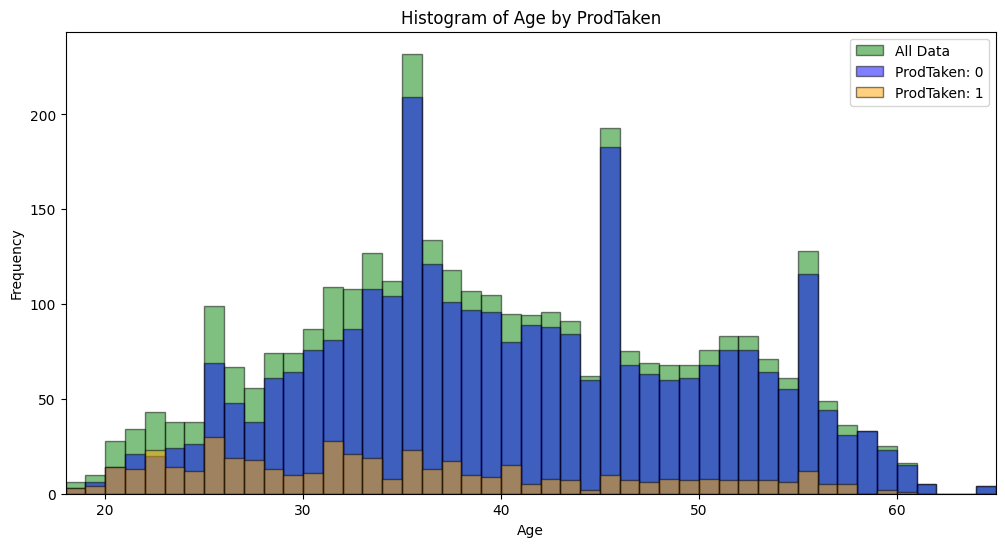

In [463]:
plot_histograms(train_df, 'Age', bins=48)

# TypeofContact

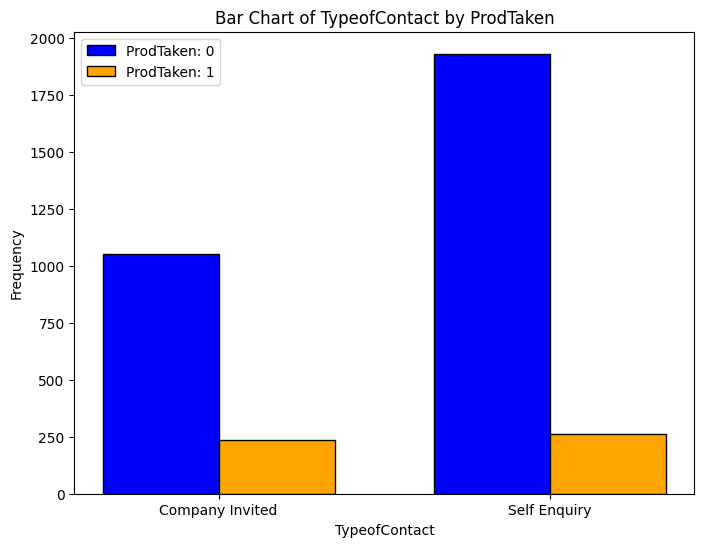

ProdTaken           0    1  ProdTaken_1_ratio
TypeofContact                                
Company Invited  1054  235           0.182312
Self Enquiry     1932  262           0.119417

In [464]:
# TypeofContact
barplots(train_df, 'TypeofContact')
crosstab_df('TypeofContact')

# CityTier

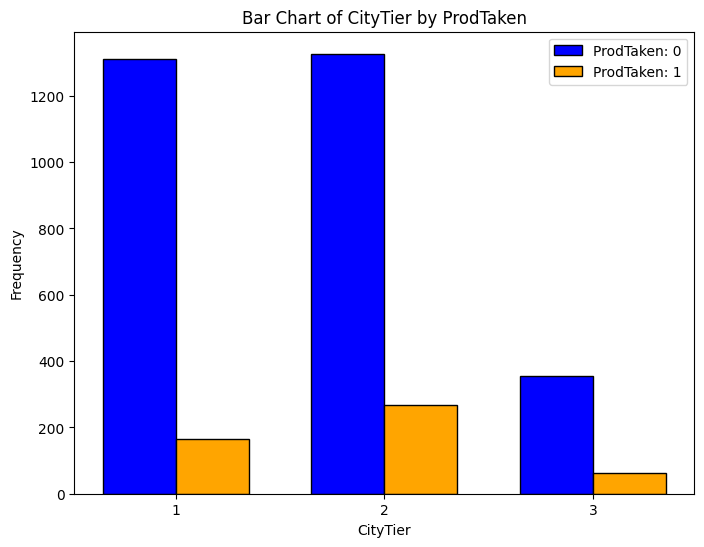

ProdTaken     0    1  ProdTaken_1_ratio
CityTier                               
1          1310  165           0.111864
2          1327  269           0.168546
3           355   63           0.150718

In [465]:
barplots(train_df, 'CityTier')
crosstab_df('CityTier')

# DurationOfPitch

In [466]:
train_df['DurationOfPitch'].value_counts()

DurationOfPitch
8ÂàÜ       259
9ÂàÜ       237
15ÂàÜ      216
14ÂàÜ      207
16ÂàÜ      202
10ÂàÜ      181
7ÂàÜ       170
13ÂàÜ      150
11ÂàÜ      113
12ÂàÜ      111
17ÂàÜ      100
540Áßí      90
480Áßí      79
420Áßí      69
6ÂàÜ        69
900Áßí      68
840Áßí      59
960Áßí      57
18ÂàÜ       56
780Áßí      53
600Áßí      50
660Áßí      47
720Áßí      47
32ÂàÜ       42
23ÂàÜ       37
1020Áßí     36
22ÂàÜ       34
24ÂàÜ       32
31ÂàÜ       31
25ÂàÜ       28
20ÂàÜ       28
27ÂàÜ       25
21ÂàÜ       24
33ÂàÜ       23
30ÂàÜ       22
26ÂàÜ       21
34ÂàÜ       21
1080Áßí     18
28ÂàÜ       18
19ÂàÜ       17
35ÂàÜ       17
1380Áßí     14
29ÂàÜ       12
1860Áßí     12
5ÂàÜ        12
1320Áßí     11
360Áßí      11
1920Áßí     11
1980Áßí     11
1680Áßí     11
1620Áßí     10
1500Áßí     10
1800Áßí      9
1740Áßí      8
1440Áßí      8
2100Áßí      8
2040Áßí      8
1200Áßí      8
1260Áßí      7
1560Áßí      6
300Áßí       6
2160Áßí      4
36ÂàÜ        3
4ÂàÜ         2
1140Áßí      2
Name: count, dtype: int64

In [467]:
# Áßí„Å®ÂàÜ„ÇíÂá¶ÁêÜ„Åó„Å¶Êñ∞„Åó„ÅÑ„Ç´„É©„É†„Çí‰ΩúÊàê
def convert_duration(duration):
    if isinstance(duration, str):  # ÊñáÂ≠óÂàóÂûã„Åß„ÅÇ„Çã„Åì„Å®„ÇíÁ¢∫Ë™ç
        if 'Áßí' in duration:
            return int(duration.replace('Áßí', '')), int(duration.replace('Áßí', '')) / 60
        elif 'ÂàÜ' in duration:
            return int(duration.replace('ÂàÜ', '')) * 60, int(duration.replace('ÂàÜ', ''))
    return np.nan, np.nan  # „Åù„ÅÆ‰ªñ„ÅÆÂ†¥Âêà„ÅØ NaN „ÇíËøî„Åô

train_df['DurationOfPitch_sec'], train_df['DurationOfPitch_min'] = zip(*train_df['DurationOfPitch'].apply(convert_duration))
test_df['DurationOfPitch_sec'], test_df['DurationOfPitch_min'] = zip(*test_df['DurationOfPitch'].apply(convert_duration))
train_df[['DurationOfPitch', 'DurationOfPitch_sec', 'DurationOfPitch_min']].head()

DurationOfPitch  DurationOfPitch_sec  DurationOfPitch_min
0            900Áßí                900.0                 15.0
1             14ÂàÜ                840.0                 14.0
2             10ÂàÜ                600.0                 10.0
3           1080Áßí               1080.0                 18.0
4           1020Áßí               1020.0                 17.0

In [468]:
plot_histograms(train_df, 'DurationOfPitch_sec', bins=50)

In [469]:
plot_histograms(train_df, 'DurationOfPitch_min', bins=33)

In [470]:
bins = [0, 10, 15, 20, 25, 30, 40]
labels = ['0-9', '10-14', '15-19', '20-24', '25-29', '30-40']

train_df['DurationOfPitch_group'] = pd.cut(train_df['DurationOfPitch_min'], bins=bins, labels=labels, right=False)
test_df['DurationOfPitch_group'] = pd.cut(test_df['DurationOfPitch_min'], bins=bins, labels=labels, right=False)

crosstab_df('DurationOfPitch_group')

ProdTaken                0    1  ProdTaken_1_ratio
DurationOfPitch_group                             
0-9                    869  135           0.134462
10-14                  874  144           0.141454
15-19                  630  142           0.183938
20-24                  177   26           0.128079
25-29                  124   25           0.167785
30-40                  214    8           0.036036

# Occupation

In [471]:
barplots(train_df, 'Occupation')
crosstab_df('Occupation')

ProdTaken          0    1  ProdTaken_1_ratio
Occupation                                  
Large Business   279   82           0.227147
Salaried        1258  143           0.102070
Small Business  1455  272           0.157499

# Gender

In [472]:
train_df['Gender'].value_counts()

Gender
Male       1226
Female      739
male        468
female      266
MALE        183
Ôº≠ÔΩÅÔΩåÔΩÖ        126
Fe Male     109
FEMALE       99
Ôº¶ÔΩÖÔΩçÔΩÅÔΩåÔΩÖ       89
ÔΩçÔΩÅÔΩåÔΩÖ         43
ÔΩÜÔΩÖÔΩçÔΩÅÔΩåÔΩÖ       36
fe male      29
FE MALE      23
Ôº≠Ôº°Ôº¨Ôº•         18
Ôº¶ÔΩÖ„ÄÄÔº≠ÔΩÅÔΩåÔΩÖ      15
Ôº¶Ôº•Ôº≠Ôº°Ôº¨Ôº•       13
ÔΩÜÔΩÖ„ÄÄÔΩçÔΩÅÔΩåÔΩÖ       6
Ôº¶Ôº•„ÄÄÔº≠Ôº°Ôº¨Ôº•       1
Name: count, dtype: int64

In [473]:
male_words = ['Male', 'male', 'MALE', 'Ôº≠ÔΩÅÔΩåÔΩÖ', 'ÔΩçÔΩÅÔΩåÔΩÖ', 'Ôº≠Ôº°Ôº¨Ôº•']
female_words = ['Female', 'female', 'Fe Male', 'FEMALE', 'Ôº¶ÔΩÖÔΩçÔΩÅÔΩåÔΩÖ', 'ÔΩÜÔΩÖÔΩçÔΩÅÔΩåÔΩÖ', 'fe male', 'FE MALE', 'Ôº¶Ôº•Ôº≠Ôº°Ôº¨Ôº•', 'Ôº¶ÔΩÖ„ÄÄÔº≠ÔΩÅÔΩåÔΩÖ', 'ÔΩÜÔΩÖ„ÄÄÔΩçÔΩÅÔΩåÔΩÖ', 'Ôº¶Ôº•„ÄÄÔº≠Ôº°Ôº¨Ôº•']
train_df['Gender'] = train_df['Gender'].apply(lambda x: 'Male' if x in male_words else ('Female' if x in female_words else x))
test_df['Gender'] = test_df['Gender'].apply(lambda x: 'Male' if x in male_words else ('Female' if x in female_words else x))

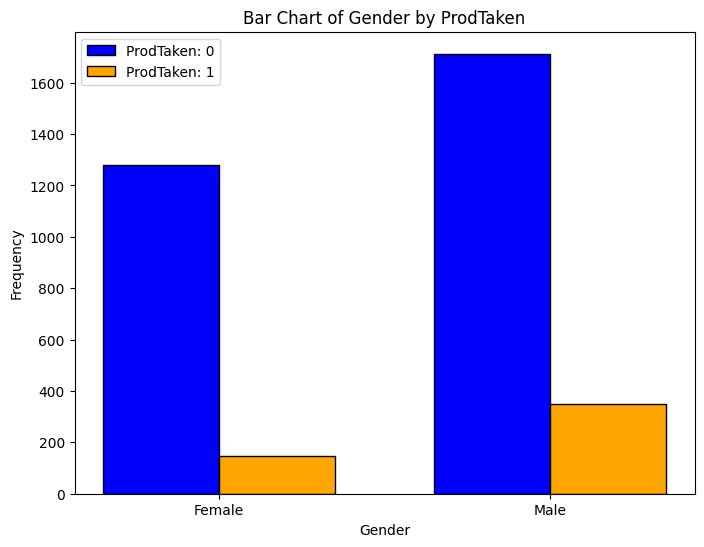

ProdTaken     0    1  ProdTaken_1_ratio
Gender                                 
Female     1279  146           0.102456
Male       1713  351           0.170058

In [474]:
barplots(train_df, 'Gender')
crosstab_df('Gender')

# NumberOfPersonVisiting

In [475]:
barplots(train_df, 'NumberOfPersonVisiting')
crosstab_df('NumberOfPersonVisiting')

ProdTaken                  0    1  ProdTaken_1_ratio
NumberOfPersonVisiting                              
1.0                      253   83           0.247024
2.0                     1363  245           0.152363
3.0                     1218  159           0.115468
4.0                      158   10           0.059524

# NumberOfFollowups

In [476]:
train_df['NumberOfFollowups'].value_counts()

NumberOfFollowups
4.0      1396
3.0      1279
5.0       519
2.0       108
1.0        77
6.0        38
300.0      17
400.0      15
500.0       5
100.0       1
600.0       1
Name: count, dtype: int64

In [477]:
test_df['NumberOfFollowups'].value_counts()

NumberOfFollowups
4.0      1350
3.0      1257
5.0       594
2.0       104
1.0        99
6.0        31
400.0      16
300.0       8
500.0       4
100.0       1
200.0       1
Name: count, dtype: int64

In [478]:
train_df['NumberOfFollowups'] = train_df['NumberOfFollowups'].replace(100.0, 1)
train_df['NumberOfFollowups'] = train_df['NumberOfFollowups'].replace(200.0, 2)
train_df['NumberOfFollowups'] = train_df['NumberOfFollowups'].replace(300.0, 3)
train_df['NumberOfFollowups'] = train_df['NumberOfFollowups'].replace(400.0, 4)
train_df['NumberOfFollowups'] = train_df['NumberOfFollowups'].replace(500.0, 5)
train_df['NumberOfFollowups'] = train_df['NumberOfFollowups'].replace(600.0, 6)

test_df['NumberOfFollowups'] = test_df['NumberOfFollowups'].replace(100.0, 1)
test_df['NumberOfFollowups'] = test_df['NumberOfFollowups'].replace(200.0, 2)
test_df['NumberOfFollowups'] = test_df['NumberOfFollowups'].replace(300.0, 3)
test_df['NumberOfFollowups'] = test_df['NumberOfFollowups'].replace(400.0, 4)
test_df['NumberOfFollowups'] = test_df['NumberOfFollowups'].replace(500.0, 5)
test_df['NumberOfFollowups'] = test_df['NumberOfFollowups'].replace(600.0, 6)

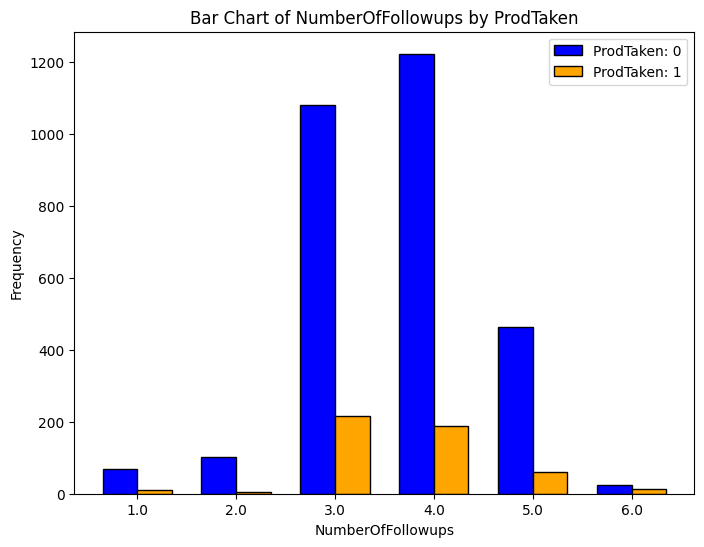

ProdTaken             0    1  ProdTaken_1_ratio
NumberOfFollowups                              
1.0                  68   10           0.128205
2.0                 102    6           0.055556
3.0                1080  216           0.166667
4.0                1222  189           0.133948
5.0                 464   60           0.114504
6.0                  25   14           0.358974

In [479]:
barplots(train_df, 'NumberOfFollowups')
crosstab_df('NumberOfFollowups')

# ProductPitched

In [480]:
train_df['ProductPitched'].value_counts()

ProductPitched
Basic           887
Deluxe          836
Standard        648
Super Deluxe    238
basic           106
BASIC           104
DELUXE           93
King             91
deluxe           88
standard         86
STANDARD         80
super deluxe     35
SUPER DELUXE     27
KING             18
Basƒ±c            15
king             14
De|uxe           12
Œíasic             9
Basiùò§             5
Delu√óe            5
Super De|uxe      4
–íasic             4
Super ·óûeluxe      4
êä°asic             4
Standùñ∫rd          3
’ètandard          3
·óûeluxe            3
Sta’∏dard          3
Basi—Å             3
Standaùò≥d          3
Basiœ≤             3
Sùòµandard          3
Standarùî°          2
Super ·é†eluxe      2
Íì¢uper Deluxe      2
–Öuper Deluxe      2
ùô≥eluxe            2
Bùñ∫sic             2
Stùñ∫ndard          2
Íì¢tandard          2
DELUXŒï            1
sta’∏dard          1
–Ötandard          1
êä°asiùò§             1
Basƒ±œ≤             1
·é†eluxe            1
Kƒ±’∏g              1
Super ùô≥eluxe      1
Ki’∏g              1
Œíasƒ±c             1
BASI–°             1
’ètandaùò≥d          1
SUPER DŒïLUXE      1
Bùñ∫siùò§             1
ŒíASI–°             1
basiœ≤             1
Kƒ±ng              1
–íùñ∫sic             1
BAÍì¢IC             1
STAN·óûARD          1
Íì¢uper De|uxe      1
BA’èIC             1
BŒëSIC             1
·é†ELUXE            1
de|u√óe            1
’èuper Deluxe      1
Œíasƒ±ùò§             1
BASŒôC             1
BaÔΩìic             1
basƒ±c             1
super de|uxe      1
de|uxe            1
ÔΩìuper deluxe      1
STANDAR·é†          1
DŒïLUXŒï            1
–ÖTANDARD          1
Name: count, dtype: int64

In [481]:
test_df['ProductPitched'].value_counts()

ProductPitched
Basic           923
Deluxe          824
Standard        591
Super Deluxe    233
King            126
basic           112
BASIC           108
DELUXE           98
deluxe           91
STANDARD         84
standard         67
super deluxe     40
SUPER DELUXE     31
KING             17
Basƒ±c            16
king             15
De|uxe           14
–Ötandard          6
BaÔΩìic             5
Super De|uxe      5
·óûeluxe            4
Delu√óe            4
Basi—Å             3
Standùñ∫rd          3
Standaùò≥d          3
Stùñ∫ndard          3
Basiœ≤             3
Super ·é†eluxe      3
Stanùî°ard          3
·é†eluxe            3
stanùî°ard          2
Íì¢tandard          2
STŒëNDARD          2
ùô≥eluxe            2
·óûELUXE            2
Sta’∏dard          2
Super ùô≥eluxe      2
DELUXŒï            2
basiœ≤             2
Basiùò§             2
basƒ±c             1
Kƒ±ng              1
BASŒôC             1
basiùò§             1
standùñ∫rd          1
Basƒ±ùò§             1
baÔΩìic             1
Bùñ∫sic             1
BASŒô–°             1
Sùòµùñ∫ndaùò≥d          1
ki’∏g              1
standarùî°          1
Standùñ∫ùò≥d          1
Œíasic             1
·é†e|uxe            1
Bùñ∫siùò§             1
SUPŒïR ·é†ELUXE      1
Íì¢uper Deluxe      1
Basƒ±œ≤             1
Super Delu√óe      1
de|uxe            1
BaÔΩìƒ±c             1
SUPER ·óûELUXE      1
SUPER ·é†ELUXE      1
STANDAR·é†          1
Super ·óûeluxe      1
BASI–°             1
êä°asic             1
–íasic             1
basi—Å             1
BA–ÖIC             1
Name: count, dtype: int64

In [482]:
basic_words = ['Basic', 'basic', 'BASIC', 'Basƒ±c', 'Œíasic', 'Basiùò§', '–íasic', 'êä°asic', 'Basi—Å', 'Basiœ≤', 'Bùñ∫sic', 'êä°asiùò§', 'Basƒ±œ≤', 'Œíasƒ±c', 'BASI–°', 'Bùñ∫siùò§', 'ŒíASI–°', 'basiœ≤', '–íùñ∫sic', 'BAÍì¢IC', 'BA’èIC', 'BŒëSIC', 'Œíasƒ±ùò§', 'BASŒôC', 'BaÔΩìic', 'basƒ±c', 'BASŒô–°', 'Basƒ±ùò§', 'baÔΩìic', 'basiùò§', 'BaÔΩìƒ±c', 'basi—Å', 'BA–ÖIC']
standard_words = ['Standard', 'standard', 'STANDARD', 'Standùñ∫rd', '’ètandard', 'Sta’∏dard', 'Standaùò≥d', 'Sùòµandard', 'Standarùî°', 'Stùñ∫ndard', 'Íì¢tandard', 'sta’∏dard', '–Ötandard', '’ètandaùò≥d', 'STAN·óûARD', 'STANDAR·é†', '–ÖTANDARD', 'Stanùî°ard', 'STŒëNDARD', 'stanùî°ard', 'standarùî°', 'standùñ∫rd', 'Sùòµùñ∫ndaùò≥d', 'Standùñ∫ùò≥d']
deluxe_words = ['DELUXE', 'deluxe', 'De|uxe', 'Delu√óe', '·óûeluxe', 'ùô≥eluxe', 'DELUXŒï', '·é†eluxe', '·é†ELUXE', 'de|uxe', 'DŒïLUXŒï', 'de|u√óe', '·óûELUXE', '·é†e|uxe']
superdeluxe_words = ['Super Deluxe', 'super deluxe', 'SUPER DELUXE', 'Super De|uxe', 'Super ·óûeluxe', 'Super ·é†eluxe', 'Íì¢uper Deluxe', '–Öuper Deluxe', 'Super ùô≥eluxe', 'SUPER DŒïLUXE', 'Íì¢uper De|uxe', '’èuper Deluxe', 'super de|uxe', 'ÔΩìuper deluxe', 'SUPŒïR ·é†ELUXE', 'Super Delu√óe', 'SUPER ·óûELUXE', 'SUPER ·é†ELUXE']
king_words = ['King', 'KING', 'king', 'Kƒ±’∏g', 'Ki’∏g', 'Kƒ±ng', 'ki’∏g']

train_df['ProductPitched'] = train_df['ProductPitched'].apply(lambda x: 'Basic' if x in basic_words else ('Standard' if x in standard_words else ('Deluxe' if x in deluxe_words else ('Super Deluxe' if x in superdeluxe_words else ('King' if x in king_words else x)))))
test_df['ProductPitched'] = test_df['ProductPitched'].apply(lambda x: 'Basic' if x in basic_words else ('Standard' if x in standard_words else ('Deluxe' if x in deluxe_words else ('Super Deluxe' if x in superdeluxe_words else ('King' if x in king_words else x)))))

In [483]:
barplots(train_df, 'ProductPitched')
crosstab_df('ProductPitched')

ProdTaken          0    1  ProdTaken_1_ratio
ProductPitched                              
Basic            806  351           0.303371
Deluxe          1010   35           0.033493
King             119    7           0.055556
Standard         765   76           0.090369
Super Deluxe     292   28           0.087500

# PreferredPropertyStar

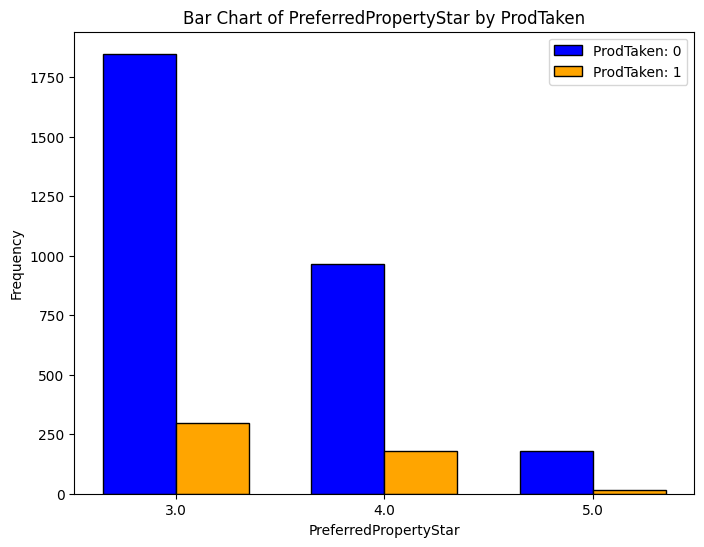

ProdTaken                 0    1  ProdTaken_1_ratio
PreferredPropertyStar                              
3.0                    1848  299           0.139264
4.0                     964  181           0.158079
5.0                     180   17           0.086294

In [484]:
barplots(train_df, 'PreferredPropertyStar')
crosstab_df('PreferredPropertyStar')

# NumberOfTrips

In [485]:
train_df['NumberOfTrips'].value_counts()

NumberOfTrips
2         1006
3          699
5          436
1          349
7          219
Âπ¥„Å´2Âõû       141
4          141
Âπ¥„Å´3Âõû       121
6          109
Âπ¥„Å´5Âõû        79
Âπ¥„Å´1Âõû        60
Âπ¥„Å´7Âõû        37
Âπ¥„Å´6Âõû        21
Âπ¥„Å´4Âõû        19
ÂçäÂπ¥„Å´1Âõû       17
8            8
ÂõõÂçäÊúü„Å´1Âõû       3
Âπ¥„Å´8Âõû         2
Name: count, dtype: int64

In [486]:
test_df['NumberOfTrips'].value_counts()

NumberOfTrips
2         950
3         762
5         400
1         320
7         226
Âπ¥„Å´2Âõû      153
4         136
6         125
Âπ¥„Å´3Âõû      124
Âπ¥„Å´1Âõû       72
Âπ¥„Å´5Âõû       62
Âπ¥„Å´4Âõû       31
Âπ¥„Å´7Âõû       31
Âπ¥„Å´6Âõû       26
8          12
ÂçäÂπ¥„Å´1Âõû      10
Âπ¥„Å´8Âõû        4
ÂõõÂçäÊúü„Å´1Âõû      3
Name: count, dtype: int64

In [487]:
train_df['NumberOfTrips'] = train_df['NumberOfTrips'].replace({
    'Âπ¥„Å´1Âõû': 1, 'Âπ¥„Å´2Âõû': 2, 'Âπ¥„Å´3Âõû': 3, 'Âπ¥„Å´4Âõû': 4,
    'Âπ¥„Å´5Âõû': 5, 'Âπ¥„Å´6Âõû': 6, 'Âπ¥„Å´7Âõû': 7, 'Âπ¥„Å´8Âõû': 8,
    'ÂçäÂπ¥„Å´1Âõû': 2, 'ÂõõÂçäÊúü„Å´1Âõû': 4
}, regex=False)

train_df['NumberOfTrips'] = pd.to_numeric(train_df['NumberOfTrips'], errors='coerce')

test_df['NumberOfTrips'] = test_df['NumberOfTrips'].replace({
    'Âπ¥„Å´1Âõû': 1, 'Âπ¥„Å´2Âõû': 2, 'Âπ¥„Å´3Âõû': 3, 'Âπ¥„Å´4Âõû': 4,
    'Âπ¥„Å´5Âõû': 5, 'Âπ¥„Å´6Âõû': 6, 'Âπ¥„Å´7Âõû': 7, 'Âπ¥„Å´8Âõû': 8,
    'ÂçäÂπ¥„Å´1Âõû': 2, 'ÂõõÂçäÊúü„Å´1Âõû': 4
}, regex=False)

test_df['NumberOfTrips'] = pd.to_numeric(test_df['NumberOfTrips'], errors='coerce')

In [488]:
barplots(train_df, 'NumberOfTrips')
crosstab_df('NumberOfTrips')

ProdTaken         0    1  ProdTaken_1_ratio
NumberOfTrips                              
1.0             331   78           0.190709
2.0            1002  162           0.139175
3.0             714  106           0.129268
4.0             142   21           0.128834
5.0             468   47           0.091262
6.0             115   15           0.115385
7.0             194   62           0.242188
8.0               8    2           0.200000

# Passport

In [489]:
barplots(train_df, 'Passport')
crosstab_df('Passport')

ProdTaken     0    1  ProdTaken_1_ratio
Passport                               
0          2757  374           0.119451
1           235  123           0.343575

# PitchSatisfactionScore

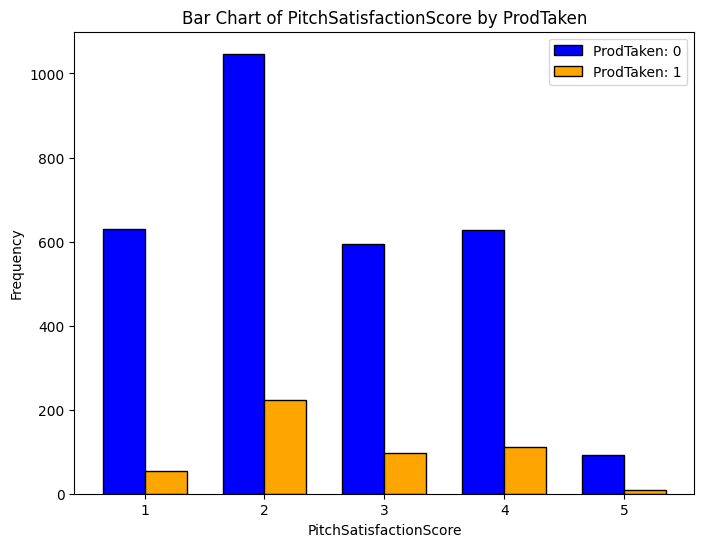

ProdTaken                  0    1  ProdTaken_1_ratio
PitchSatisfactionScore                              
1                        631   55           0.080175
2                       1047  222           0.174941
3                        594   98           0.141618
4                        627  112           0.151556
5                         93   10           0.097087

In [490]:
barplots(train_df, 'PitchSatisfactionScore')
crosstab_df('PitchSatisfactionScore')

# Designation

In [491]:
train_df['Designation'].value_counts()

Designation
Executive         1090
Manager           1011
Senior Manager     825
AVP                299
VP                 117
Œúanager             13
Ex–µcutive           10
Ex–µcutiv–µ            9
ManŒ±ger              8
Manag–µr              8
Executiv–µ            7
–êVP                  7
Executi—µe            6
Senior Manag–µr       6
ExecuÔΩîive            5
Senior ManŒ±ger       4
MŒ±nager              4
ŒëVP                  3
Ex–µcuti—µ–µ            3
Manageùôß              3
–ïxecutive            3
S–µnior Manager       3
Senior MŒ±nŒ±ger       3
Ex–µcÔΩïtive            2
Senior Manageùôß       2
’èenior Manager       2
VÔº∞                   2
–ï√ó–µcutive            2
E√óecutive            2
MŒ±nageùôß              2
AVÔº∞                  2
Executi—µ–µ            2
MŒ±nŒ±ger              2
–Öenior Manager       2
–ïxecutiv–µ            2
S–µnior Manag–µr       1
E√óecÔΩïtive            1
MŒ±nag–µr              1
Ex–µcÔΩïtiv–µ            1
–ïx–µcutiv–µ            1
Senior MŒ±nager       1
Œúanag–µr              1
ManŒ±g–µr              1
ExecÔΩïtive            1
–Öenior ManŒ±ger       1
E√ó–µcuti—µe            1
’èenior Œúanager       1
Œúanageùôß              1
Senioùôß Manager       1
Senior Manag–µùôß       1
–ïxecuÔΩîive            1
Senior ŒúanŒ±ger       1
–ï√óecutive            1
Name: count, dtype: int64

In [492]:
test_df['Designation'].value_counts()

Designation
Executive         1129
Manager           1016
Senior Manager     740
AVP                305
VP                 142
Ex–µcutiv–µ           10
Manag–µr             10
Executiv–µ            9
Ex–µcutive            9
MŒ±nager              9
ManŒ±ger              8
ŒëVP                  8
–êVP                  7
Executi—µe            7
Senior Manag–µr       6
Senioùôß Manager       5
–ïxecutive            5
Manageùôß              5
Œúanager              5
S–µnior Manager       4
VÔº∞                   3
ExecÔΩïtive            3
Senior Manageùôß       3
Senior Œúanager       2
–Öenior Manager       2
Senior ManŒ±ger       2
AVÔº∞                  2
’èenior Manager       2
E√óecutive            2
ŒúŒ±nager              2
MŒ±nŒ±ger              2
ExecÔΩïtiv–µ            1
S–µnioùôß Manager       1
Ex–µcÔΩïtiv–µ            1
MŒ±nŒ±g–µr              1
S–µnior Manag–µr       1
–êVÔº∞                  1
Senior MŒ±nŒ±ger       1
Senior Manag–µùôß       1
MŒ±nag–µr              1
–ïxecÔΩïtive            1
Senioùôß Manageùôß       1
Senioùôß MŒ±nageùôß       1
ExecuÔΩîive            1
S–µnior Manag–µùôß       1
Senioùôß Manag–µr       1
’èenior Œúanager       1
Manag–µùôß              1
ExecÔΩïÔΩîive            1
ManŒ±g–µr              1
ŒúŒ±nag–µr              1
Ex–µcuÔΩîive            1
–Öenior Œúanageùôß       1
ŒëVÔº∞                  1
Senioùôß ManŒ±ger       1
Senior MŒ±nager       1
Name: count, dtype: int64

In [493]:
maneger_words = ['Manager', 'Œúanager', 'ManŒ±ger', 'Manag–µr', 'MŒ±nager', 'Manageùôß', 'MŒ±nageùôß', 'MŒ±nŒ±ger', 'MŒ±nag–µr', 'Œúanag–µr', 'ManŒ±g–µr', 'Œúanageùôß', 'ŒúŒ±nager', 'MŒ±nŒ±g–µr', 'ŒúŒ±nag–µr', 'Manag–µùôß']
seniormanager_words = ['Senior Manager', 'Senior Manag–µr', 'Senior ManŒ±ger', 'S–µnior Manager', 'Senior MŒ±nŒ±ger', 'Senior Manageùôß', '’èenior Manager', '–Öenior Manager', 'S–µnior Manag–µr', 'Senior MŒ±nager', '–Öenior ManŒ±ger', '’èenior Œúanager', 'Senior ŒúanŒ±ger', 'Senior Manag–µùôß', 'Senioùôß Manager', 'Senior Œúanager', 'Senioùôß MŒ±nageùôß', 'S–µnior Manag–µùôß', 'Senioùôß Manag–µr', '–Öenior Œúanageùôß', 'Senioùôß ManŒ±ger', 'Senioùôß Manageùôß', 'S–µnioùôß Manager']
executive_words = ['Executive', 'Ex–µcutive', 'Ex–µcutiv–µ', 'Executiv–µ', 'Executi—µe', 'ExecuÔΩîive', 'Ex–µcuti—µ–µ', '–ïxecutive', 'Ex–µcÔΩïtive', '–ï√ó–µcutive', 'E√óecutive', 'Executi—µ–µ', '–ïxecutiv–µ', 'E√óecÔΩïtive', '–ïxecuÔΩîive', 'E√ó–µcuti—µe', 'ExecÔΩïtive', 'Ex–µcÔΩïtiv–µ', '–ïx–µcutiv–µ', '–ï√óecutive', 'Ex–µcuÔΩîive', 'ExecÔΩïÔΩîive', 'ExecÔΩïtiv–µ', '–ïxecÔΩïtive']
avp_words = ['AVP', '–êVP', 'ŒëVP', 'AVÔº∞', 'ŒëVÔº∞', '–êVÔº∞']
vp_words= ['VP', 'VÔº∞']

train_df['Designation'] = train_df['Designation'].apply(lambda x: 'Manager' if x in maneger_words else ('Senior Manager' if x in seniormanager_words else ('Executive' if x in executive_words else ('AVP' if x in avp_words else ('VP' if x in vp_words else x)))))
test_df['Designation'] = test_df['Designation'].apply(lambda x: 'Manager' if x in maneger_words else ('Senior Manager' if x in seniormanager_words else ('Executive' if x in executive_words else ('AVP' if x in avp_words else ('VP' if x in vp_words else x)))))

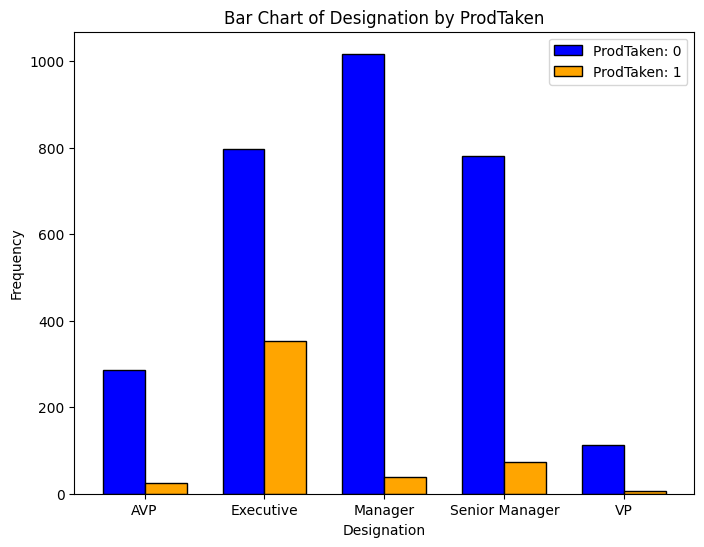

ProdTaken          0    1  ProdTaken_1_ratio
Designation                                 
AVP              287   24           0.077170
Executive        796  354           0.307826
Manager         1017   38           0.036019
Senior Manager   780   74           0.086651
VP               112    7           0.058824

In [494]:
barplots(train_df, 'Designation')
crosstab_df('Designation')

# MonthlyIncome

In [495]:
train_df['MonthlyIncome'].head(10)

0    253905.0
1    404475.0
2    278145.0
3    326805.0
4    258435.0
5    ÊúàÂèé26.0‰∏áÂÜÜ
6    453180.0
7    261900.0
8    247800.0
9    257610.0
Name: MonthlyIncome, dtype: object

In [496]:
def convert_numeric(monthlyincome):
    # Êï∞ÂÄ§Âûã„Åæ„Åü„ÅØÊï∞ÂÄ§„Å®„Åó„Å¶Ë°®Áèæ„Åï„Çå„ÅüÊñáÂ≠óÂàó„ÅÆÂ†¥Âêà
    try:
        # Êï∞ÂÄ§Âûã„ÇÑ„ÄÅÊï∞ÂÄ§„ÇíË°®„ÅôÊñáÂ≠óÂàóÔºà‰æã: '300000'Ôºâ„ÅÆÂ†¥Âêà„ÅØ„Åù„ÅÆ„Åæ„ÅæÊï∞ÂÄ§Âûã„Å´Â§âÊèõ
        return float(monthlyincome)
    except (ValueError, TypeError):
        pass  # Êï∞ÂÄ§„Å®„Åó„Å¶Â§âÊèõ„Åß„Åç„Å™„ÅÑÂ†¥Âêà„ÅØÊ¨°„ÅÆÂá¶ÁêÜ„Å∏

    # ÊñáÂ≠óÂàóÂûã„ÅßÁâπÊÆä„Å™„Éï„Ç©„Éº„Éû„ÉÉ„Éà„ÅÆÂ†¥Âêà
    if isinstance(monthlyincome, str):
        if 'ÊúàÂèé' in monthlyincome:
            monthlyincome = monthlyincome.replace('ÊúàÂèé', '').replace('‰∏áÂÜÜ', '').strip()
            return int(float(monthlyincome) * 10000)
        elif '‰∏áÂÜÜ' in monthlyincome:
            monthlyincome = monthlyincome.replace('‰∏áÂÜÜ', '').strip()
            return int(float(monthlyincome) * 10000)

    # „Åù„ÅÆ‰ªñ„ÅÆÂ†¥Âêà„ÅØ NaN „ÇíËøî„Åô
    return np.nan

train_df['MonthlyIncome'] = train_df['MonthlyIncome'].apply(convert_numeric)
test_df['MonthlyIncome'] = test_df['MonthlyIncome'].apply(convert_numeric)


In [497]:
train_df['MonthlyIncome'].head(10)

0    253905.0
1    404475.0
2    278145.0
3    326805.0
4    258435.0
5    260000.0
6    453180.0
7    261900.0
8    247800.0
9    257610.0
Name: MonthlyIncome, dtype: float64

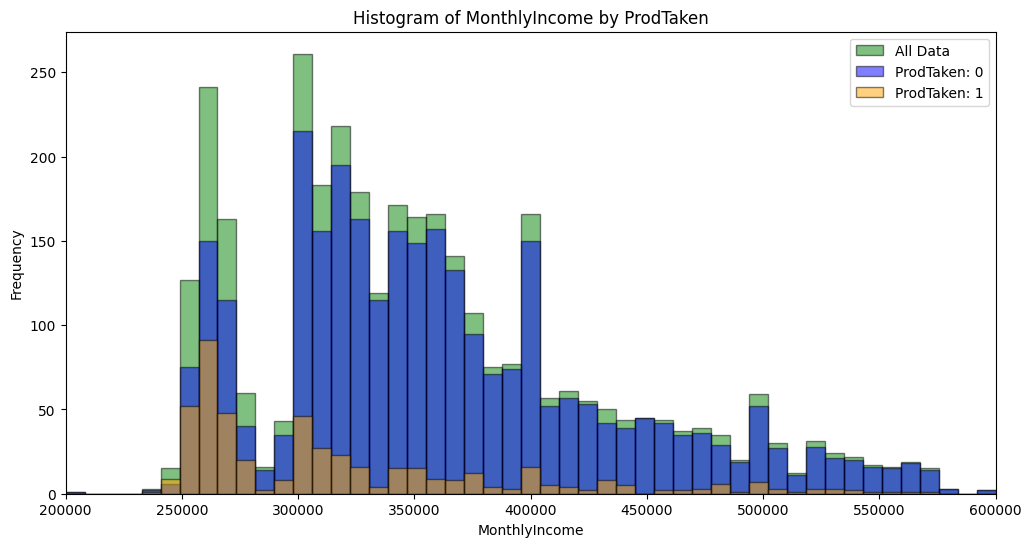

In [498]:
plot_histograms(train_df, 'MonthlyIncome', bins=50)

# customer_info

In [499]:
train_df['customer_info'].value_counts().head(20)

customer_info
ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ1‰∫∫      34
ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõ1‰∫∫       31
ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ„ÄÅÂ≠ê‰æõ1‰∫∫    20
Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ1‰∫∫      20
Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõ1‰∫∫       19
Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõ„Å™„Åó       18
Êú™Â©ö„ÄÅËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ1‰∫∫        18
Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ„Å™„Åó      17
Èõ¢Â©öÊ∏à„Åø ËªäÊâÄÊåÅ Â≠ê‰æõ1‰∫∫       16
ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅ„Åì„Å©„ÇÇ1‰∫∫      16
ÁµêÂ©öÊ∏à„Åø ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ1‰∫∫      16
ÁµêÂ©öÊ∏à„Åø/ËªäÊú™ÊâÄÊåÅ/Â≠ê‰æõ1‰∫∫      15
ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ2‰∫∫      15
Èõ¢Â©öÊ∏à„Åø ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ1‰∫∫      15
ÁµêÂ©öÊ∏à„Åø ËªäÊâÄÊåÅ „Åì„Å©„ÇÇ1‰∫∫      14
ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõ2‰∫∫       14
ÁµêÂ©öÊ∏à„Åø ËªäÊâÄÊåÅ Â≠ê‰æõ1‰∫∫       13
ÁµêÂ©öÊ∏à„Åø ËªäÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó       13
Áã¨Ë∫´„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõ„Å™„Åó         13
Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅ„Åì„Å©„ÇÇ1‰∫∫      12
Name: count, dtype: int64

In [500]:
# 'customer_info' „Ç´„É©„É†„ÇíÂàÜËß£
# ÂàÜÂâ≤Âá¶ÁêÜ
def split_info(info):
    # ÊúÄÂàù„ÅÆ2„Å§„ÅÆË¶ÅÁ¥†„Å®„ÄÅ„Åù„Çå‰ª•Èôç„ÇíÂàÜÂâ≤
    parts = info.split(' ', 2)  # 2 „Å§ÁõÆ„ÅÆË¶ÅÁ¥†„Åæ„ÅßÂàÜÂâ≤„Åó„ÄÅ„Åù„Çå‰ª•Èôç„Çí„Åæ„Å®„ÇÅ„Çã
    if len(parts) == 3:
        return parts[0], parts[1], parts[2]
    elif len(parts) == 2:
        return parts[0], parts[1], ''  # 3„Å§ÁõÆ„ÅåÂ≠òÂú®„Åó„Å™„ÅÑÂ†¥Âêà„ÄÅÁ©∫ÊñáÂ≠óÂàó„ÇíËøî„Åô
    elif len(parts) == 1:
        return parts[0], '', ''  # 2„Å§ÁõÆ„Å®3„Å§ÁõÆ„ÅåÂ≠òÂú®„Åó„Å™„ÅÑÂ†¥Âêà
    return '', '', ''  # ‰∏á„Åå‰∏Ä‰Ωï„ÇÇ„Å™„ÅÑÂ†¥Âêà

train_df['customer_info'] = (
    train_df['customer_info']
    .str.replace('„ÄÅ', ' ', regex=False)
    .str.replace(',', ' ', regex=False)
    .str.replace('/', ' ', regex=False)
    .str.replace('Ôºè', ' ', regex=False)
    .str.replace('\n', ' ', regex=False)
    .str.replace('\t', ' ', regex=False)
    .str.replace('„ÄÄ', ' ', regex=False)
)
train_df[['MaritalStatus', 'CarOwnership', 'Children']] = train_df['customer_info'].apply(lambda x: pd.Series(split_info(x)))

test_df['customer_info'] = (
    test_df['customer_info']
    .str.replace('„ÄÅ', ' ', regex=False)
    .str.replace(',', ' ', regex=False)
    .str.replace('/', ' ', regex=False)
    .str.replace('Ôºè', ' ', regex=False)
    .str.replace('\n', ' ', regex=False)
    .str.replace('\t', ' ', regex=False)
    .str.replace('„ÄÄ', ' ', regex=False)
)
test_df[['MaritalStatus', 'CarOwnership', 'Children']] = test_df['customer_info'].apply(lambda x: pd.Series(split_info(x)))

# ÁµêÊûú„ÇíÁ¢∫Ë™ç
train_df[['customer_info', 'MaritalStatus', 'CarOwnership', 'Children']].head()

customer_info MaritalStatus CarOwnership Children
0      Êú™Â©ö ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó            Êú™Â©ö         ËªäÊú™ÊâÄÊåÅ     Â≠ê‰æõ„Å™„Åó
1     Èõ¢Â©öÊ∏à„Åø Ëªä„ÅÇ„Çä Â≠ê‰æõÁÑ°„Åó          Èõ¢Â©öÊ∏à„Åø          Ëªä„ÅÇ„Çä     Â≠ê‰æõÁÑ°„Åó
2  ÁµêÂ©öÊ∏à„Åø Ëá™ÂãïËªäÊú™ÊâÄÊúâ Â≠ê‰æõ„Å™„Åó          ÁµêÂ©öÊ∏à„Åø       Ëá™ÂãïËªäÊú™ÊâÄÊúâ     Â≠ê‰æõ„Å™„Åó
3     Èõ¢Â©öÊ∏à„Åø ËªäÊâÄÊåÅ Â≠ê‰æõÁÑ°„Åó          Èõ¢Â©öÊ∏à„Åø          ËªäÊâÄÊåÅ     Â≠ê‰æõÁÑ°„Åó
4         Áã¨Ë∫´ ËªäÊâÄÊåÅ ÁÑ°Â≠ê            Áã¨Ë∫´          ËªäÊâÄÊåÅ       ÁÑ°Â≠ê

In [501]:
barplots(train_df, 'MaritalStatus')
crosstab_df('MaritalStatus')

ProdTaken         0    1  ProdTaken_1_ratio
MaritalStatus                              
Êú™Â©ö              538   43           0.074010
Áã¨Ë∫´              430  216           0.334365
ÁµêÂ©öÊ∏à„Åø           1248  136           0.098266
Èõ¢Â©öÊ∏à„Åø            776  102           0.116173

In [502]:
car_words = ['ËªäÊâÄÊåÅ', 'Ëá™ÂãïËªäÊâÄÊúâ', 'Ëá™ÂÆ∂Áî®Ëªä„ÅÇ„Çä', '‰πóÁî®ËªäÊâÄÊåÅ', 'Ëªä‰øùÊúâ', 'Ëªä„ÅÇ„Çä']
noncar_words = ['ËªäÊú™ÊâÄÊåÅ', 'Ëá™ÂãïËªäÊú™ÊâÄÊúâ', 'Ëá™ÂÆ∂Áî®Ëªä„Å™„Åó', '‰πóÁî®Ëªä„Å™„Åó', 'Ëªä‰øùÊúâ„Å™„Åó', 'Ëªä„Å™„Åó']

train_df['CarOwnership'] = train_df['CarOwnership'].apply(lambda x: 'Car' if x in car_words else ('Non-Car' if x in noncar_words else x))
test_df['CarOwnership'] = test_df['CarOwnership'].apply(lambda x: 'Car' if x in car_words else ('Non-Car' if x in noncar_words else x))

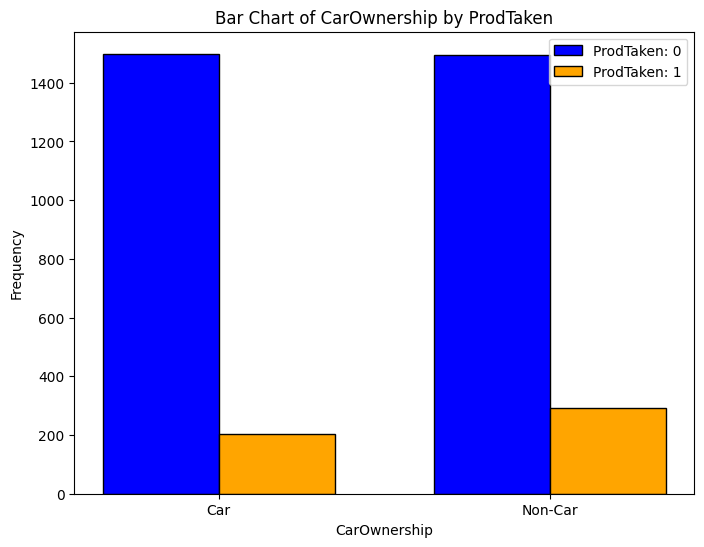

ProdTaken        0    1  ProdTaken_1_ratio
CarOwnership                              
Car           1499  205           0.120305
Non-Car       1493  292           0.163585

In [503]:
barplots(train_df, 'CarOwnership')
crosstab_df('CarOwnership')

In [504]:
train_df['Children'].value_counts()

Children
Â≠ê‰æõ1‰∫∫        859
Â≠ê‰æõ„Å™„Åó        539
Â≠ê‰æõ2‰∫∫        434
„Åì„Å©„ÇÇ1‰∫∫       410
Â≠ê‰æõÁÑ°„Åó        252
„Åì„Å©„ÇÇ2‰∫∫       229
1ÂÖê          113
Â≠ê‰æõÊúâ„Çä(1‰∫∫)     94
Â≠ê‰æõÊúâ„Çä 1‰∫∫      94
Â≠ê‰æõ„Çº„É≠         75
ÈùûËÇ≤ÂÖêÂÆ∂Â∫≠        62
Â≠ê‰æõÊúâ„Çä 2‰∫∫      61
ÁÑ°Â≠ê           57
2ÂÖê           51
Â≠ê‰æõÊúâ„Çä(2‰∫∫)     49
Â≠ê‰æõ3‰∫∫         35
„Åì„Å©„ÇÇ3‰∫∫        20
Â≠ê‰æõ„ÅÆÊï∞‰∏çÊòé       13
3ÂÖê           10
‰∏çÊòé           10
Â≠ê‰æõÊúâ„Çä 3‰∫∫       5
„Çè„Åã„Çâ„Å™„ÅÑ         5
Â≠êËÇ≤„Å¶Áä∂Ê≥Å‰∏çÊòé       5
Â≠ê„ÅÆÊï∞‰∏çË©≥         4
Â≠ê‰æõÊúâ„Çä(3‰∫∫)      3
Name: count, dtype: int64

In [505]:
train_df['Children'].value_counts().sum()

3489

In [506]:
test_df['Children'].value_counts()

Children
Â≠ê‰æõ1‰∫∫        840
Â≠ê‰æõ„Å™„Åó        499
Â≠ê‰æõ2‰∫∫        487
„Åì„Å©„ÇÇ1‰∫∫       422
Â≠ê‰æõÁÑ°„Åó        255
„Åì„Å©„ÇÇ2‰∫∫       227
1ÂÖê          107
Â≠ê‰æõÊúâ„Çä(1‰∫∫)    100
Â≠ê‰æõÊúâ„Çä 1‰∫∫      95
Â≠ê‰æõÊúâ„Çä(2‰∫∫)     66
ÁÑ°Â≠ê           64
Â≠ê‰æõÊúâ„Çä 2‰∫∫      60
2ÂÖê           57
ÈùûËÇ≤ÂÖêÂÆ∂Â∫≠        56
Â≠ê‰æõ„Çº„É≠         50
Â≠ê‰æõ3‰∫∫         35
Â≠ê‰æõ„ÅÆÊï∞‰∏çÊòé       26
„Åì„Å©„ÇÇ3‰∫∫        18
‰∏çÊòé            7
Â≠ê‰æõÊúâ„Çä 3‰∫∫       6
3ÂÖê            4
Â≠ê‰æõÊúâ„Çä(3‰∫∫)      4
Â≠êËÇ≤„Å¶Áä∂Ê≥Å‰∏çÊòé       3
Â≠ê„ÅÆÊï∞‰∏çË©≥         1
Name: count, dtype: int64

In [507]:
test_df['Children'].value_counts().sum()

3489

In [508]:
onechild_words = ['Â≠ê‰æõ1‰∫∫', '„Åì„Å©„ÇÇ1‰∫∫', '1ÂÖê', 'Â≠ê‰æõÊúâ„Çä(1‰∫∫)', 'Â≠ê‰æõÊúâ„Çä 1‰∫∫']
twochildren_words = ['Â≠ê‰æõ2‰∫∫', '„Åì„Å©„ÇÇ2‰∫∫', 'Â≠ê‰æõÊúâ„Çä 2‰∫∫', '2ÂÖê', 'Â≠ê‰æõÊúâ„Çä(2‰∫∫)']
threechildren_words = ['Â≠ê‰æõ3‰∫∫', '„Åì„Å©„ÇÇ3‰∫∫', '3ÂÖê', 'Â≠ê‰æõÊúâ„Çä 3‰∫∫', 'Â≠ê‰æõÊúâ„Çä(3‰∫∫)']
unknown_words = ['Â≠ê‰æõ„ÅÆÊï∞‰∏çÊòé', '‰∏çÊòé', '„Çè„Åã„Çâ„Å™„ÅÑ', 'Â≠êËÇ≤„Å¶Áä∂Ê≥Å‰∏çÊòé', 'Â≠ê„ÅÆÊï∞‰∏çË©≥']
nonchild_words = ['Â≠ê‰æõ„Å™„Åó', 'Â≠ê‰æõÁÑ°„Åó', 'Â≠ê‰æõ„Çº„É≠', 'ÈùûËÇ≤ÂÖêÂÆ∂Â∫≠', 'ÁÑ°Â≠ê']

train_df['Children'] = train_df['Children'].apply(lambda x: 1 if x in onechild_words else (2 if x in twochildren_words else (3 if x in threechildren_words else (np.nan if x in unknown_words else (0 if x in nonchild_words else x)))))
test_df['Children'] = test_df['Children'].apply(lambda x: 1 if x in onechild_words else (2 if x in twochildren_words else (3 if x in threechildren_words else (np.nan if x in unknown_words else (0 if x in nonchild_words else x)))))

In [509]:
barplots(train_df, 'Children')
crosstab_df('Children')

ProdTaken     0    1  ProdTaken_1_ratio
Children                               
0.0         771  214           0.217259
1.0        1390  180           0.114650
2.0         726   98           0.118932
3.0          68    5           0.068493

# „Éá„Éº„Çø„Çª„ÉÉ„Éà

In [510]:
for col in train_df.columns:
  if train_df[col].dtypes == 'object':
    train_df[col] = train_df[col].astype('category')

for col in test_df.columns:
  if test_df[col].dtypes == 'object':
    test_df[col] = test_df[col].astype('category')

In [511]:
information_df(train_df)

(index, col) : (3489, 24)


dtypes  NaN Count  Nunique  \
id                         int64          0     3489   
Age                        Int64        102       45   
TypeofContact           category          6        2   
CityTier                   int64          0        3   
DurationOfPitch         category        121       65   
Occupation              category          0        3   
Gender                  category          0        2   
NumberOfPersonVisiting   float64          0        4   
NumberOfFollowups        float64         33        6   
ProductPitched          category          0        5   
PreferredPropertyStar    float64          0        3   
NumberOfTrips            float64         22        8   
Passport                   int64          0        2   
PitchSatisfactionScore     int64          0        5   
Designation             category          0        5   
MonthlyIncome            float64         56     2541   
customer_info           category          0      606   
ProdTaken                  int64          0        2   
DurationOfPitch_sec      float64        121       33   
DurationOfPitch_min      float64        121       33   
DurationOfPitch_group   category        121        6   
MaritalStatus           category          0        4   
CarOwnership            category          0        2   
Children                 float64         37        4   

                                                            Unique Values  
id                      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
Age                     [50, 56, <NA>, 37, 48, 19, 47, 49, 33, 31, 51,...  
TypeofContact                        [Self Enquiry, Company Invited, nan]  
CityTier                                                        [2, 1, 3]  
DurationOfPitch         [900Áßí, 14ÂàÜ, 10ÂàÜ, 1080Áßí, 1020Áßí, 16ÂàÜ, 840Áßí, 22ÂàÜ,...  
Occupation                     [Large Business, Salaried, Small Business]  
Gender                                                     [Male, Female]  
NumberOfPersonVisiting                               [1.0, 2.0, 3.0, 4.0]  
NumberOfFollowups                     [4.0, 3.0, 5.0, 1.0, 2.0, nan, 6.0]  
ProductPitched              [Basic, Standard, Super Deluxe, Deluxe, King]  
PreferredPropertyStar                                     [3.0, 4.0, 5.0]  
NumberOfTrips               [5.0, 2.0, 4.0, 1.0, 6.0, 3.0, 7.0, 8.0, nan]  
Passport                                                           [1, 0]  
PitchSatisfactionScore                                    [4, 5, 3, 2, 1]  
Designation                 [Executive, Senior Manager, AVP, Manager, VP]  
MonthlyIncome           [253905.0, 404475.0, 278145.0, 326805.0, 25843...  
customer_info           [Êú™Â©ö ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó, Èõ¢Â©öÊ∏à„Åø Ëªä„ÅÇ„Çä Â≠ê‰æõÁÑ°„Åó, ÁµêÂ©öÊ∏à„Åø Ëá™ÂãïËªäÊú™ÊâÄÊúâ Â≠ê‰æõ„Å™„Åó...  
ProdTaken                                                          [1, 0]  
DurationOfPitch_sec     [900.0, 840.0, 600.0, 1080.0, 1020.0, 960.0, 1...  
DurationOfPitch_min     [15.0, 14.0, 10.0, 18.0, 17.0, 16.0, 22.0, 20....  
DurationOfPitch_group       [15-19, 10-14, 20-24, 30-40, 0-9, nan, 25-29]  
MaritalStatus                                        [Êú™Â©ö, Èõ¢Â©öÊ∏à„Åø, ÁµêÂ©öÊ∏à„Åø, Áã¨Ë∫´]  
CarOwnership                                               [Non-Car, Car]  
Children                                        [0.0, nan, 1.0, 2.0, 3.0]

In [512]:
information_df(test_df)

(index, col) : (3489, 23)


dtypes  NaN Count  Nunique  \
id                         int64          0     3489   
Age                        Int64         95       44   
TypeofContact           category         12        2   
CityTier                   int64          0        3   
DurationOfPitch         category        131       65   
Occupation              category          0        3   
Gender                  category          0        2   
NumberOfPersonVisiting   float64          0        4   
NumberOfFollowups        float64         24        6   
ProductPitched          category          0        5   
PreferredPropertyStar    float64          0        3   
NumberOfTrips            float64         42        8   
Passport                   int64          0        2   
PitchSatisfactionScore     int64          0        5   
Designation             category          0        5   
MonthlyIncome            float64         49     2527   
customer_info           category          0      605   
DurationOfPitch_sec      float64        131       33   
DurationOfPitch_min      float64        131       33   
DurationOfPitch_group   category        131        6   
MaritalStatus           category          0        4   
CarOwnership            category          0        2   
Children                 float64         37        4   

                                                            Unique Values  
id                      [3489, 3490, 3491, 3492, 3493, 3494, 3495, 349...  
Age                     [48, 35, 25, 21, 41, 45, 44, 30, 31, 47, 43, 5...  
TypeofContact                        [Self Enquiry, Company Invited, nan]  
CityTier                                                        [2, 1, 3]  
DurationOfPitch         [13ÂàÜ, 12ÂàÜ, 540Áßí, 420Áßí, 7ÂàÜ, nan, 8ÂàÜ, 16ÂàÜ, 22ÂàÜ, ...  
Occupation                     [Small Business, Salaried, Large Business]  
Gender                                                     [Male, Female]  
NumberOfPersonVisiting                               [1.0, 2.0, 3.0, 4.0]  
NumberOfFollowups                     [4.0, 3.0, 5.0, 1.0, 2.0, 6.0, nan]  
ProductPitched              [Super Deluxe, Standard, Basic, Deluxe, King]  
PreferredPropertyStar                                     [3.0, 4.0, 5.0]  
NumberOfTrips               [7.0, 4.0, 1.0, 6.0, 5.0, 3.0, 2.0, nan, 8.0]  
Passport                                                           [0, 1]  
PitchSatisfactionScore                                    [3, 4, 5, 2, 1]  
Designation                 [AVP, Senior Manager, Executive, Manager, VP]  
MonthlyIncome           [496950.0, 300000.0, 260000.0, 259875.0, 26883...  
customer_info           [ÁµêÂ©öÊ∏à„Åø ËªäÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó, ÁµêÂ©öÊ∏à„Åø ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó, Èõ¢Â©öÊ∏à„Åø Ëá™ÂãïËªäÊú™ÊâÄÊúâ Â≠ê‰æõ...  
DurationOfPitch_sec     [780.0, 720.0, 540.0, 420.0, nan, 480.0, 960.0...  
DurationOfPitch_min     [13.0, 12.0, 9.0, 7.0, nan, 8.0, 16.0, 22.0, 2...  
DurationOfPitch_group       [10-14, 0-9, nan, 15-19, 20-24, 30-40, 25-29]  
MaritalStatus                                        [ÁµêÂ©öÊ∏à„Åø, Èõ¢Â©öÊ∏à„Åø, Áã¨Ë∫´, Êú™Â©ö]  
CarOwnership                                               [Car, Non-Car]  
Children                                        [0.0, nan, 1.0, 2.0, 3.0]

In [513]:
features = [
    'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch_min', 'Occupation', 'Gender',
    'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
    'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
    'Designation', 'MonthlyIncome', 'MaritalStatus', 'CarOwnership', 'Children'
]
x_train = train_df[features]
y_train = train_df['ProdTaken']

In [514]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.05,
    'random_state': 123,
    'num_leaves': 16,
    'n_estimators': 1000,
    'importance_type': 'gain',
    'verbose': -1,
    'min_data_in_leaf': 100,
    'max_depth': 5,
    'lambda_l1': 0.1,
    'lambda_l2': 0.5,
    'feature_fraction': 0.6,
    'bagging_fraction': 0.6,
    'bagging_freq': 4,
}

In [515]:
metric=[]
imp=pd.DataFrame()
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=123)

for nfold, (train_index, val_index) in enumerate(cv.split(x_train, y_train)):
    print('-'*20, nfold, '-'*20)
    x_tr, y_tr = x_train.iloc[train_index], y_train.iloc[train_index]
    x_va, y_va = x_train.iloc[val_index], y_train.iloc[val_index]

    model = lgb.LGBMClassifier(**params)
    model.fit(
        x_tr, y_tr,
        eval_set= [(x_tr, y_tr), (x_va, y_va)],
        callbacks=[
            lgb.callback.early_stopping(stopping_rounds=100),
            lgb.callback.log_evaluation(period=100)
        ]
    )

    y_tr_pred = model.predict_proba(x_tr)[:, 1]
    y_va_pred = model.predict_proba(x_va)[:, 1]

    metric_tr = roc_auc_score(y_tr, y_tr_pred)
    metric_va = roc_auc_score(y_va, y_va_pred)

    metric.append((nfold, metric_tr, metric_va))

    print("Tr:", metric_tr)
    print("Va:", metric_va)

    _imp = pd.DataFrame({
        'col': x_train.columns,
        'imp': model.feature_importances_,
        'fold': nfold
    })
    imp = pd.concat([imp, _imp], axis=0, ignore_index=True)

print('-'*50)
print(pd.DataFrame(metric, columns=["Fold", "Train", "Va"]))
print('-'*50)

metric = np.array(metric)
print('[tr]: {:3f}+-{:2f}'.format(metric[:, 1].mean(), metric[:, 1].std()), '[va]: {:3f}+-{:2f}'.format(metric[:, 2].mean(), metric[:, 2].std()))

-------------------- 0 --------------------
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.887539	valid_1's auc: 0.854398
[200]	training's auc: 0.914269	valid_1's auc: 0.856221
Early stopping, best iteration is:
[135]	training's auc: 0.898666	valid_1's auc: 0.858579
Tr: 0.8986656397500888
Va: 0.8585785953177257
-------------------- 1 --------------------
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.887978	valid_1's auc: 0.83903
Early stopping, best iteration is:
[86]	training's auc: 0.883983	valid_1's auc: 0.845719
Tr: 0.8839826265916682
Va: 0.8457190635451506
-------------------- 2 --------------------
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.887425	valid_1's auc: 0.858131
[200]	training's auc: 0.916134	valid_1's auc: 0.855449
Early stopping, best iteration is:
[135]	training's auc: 0.900557	valid_1's auc: 0.862886
Tr: 0.9005569006755465
Va: 0.8628859547056542
-

In [516]:
imp_df = imp.groupby('col')['imp'].agg(['mean', 'std'])
imp_df.columns = ['imp', 'imp_std']
imp_df.reset_index(drop=False)
imp_df.sort_values('imp', ascending=False)

imp     imp_std
col                                           
Designation             967.606586  271.365691
MonthlyIncome           653.065431  413.897958
Age                     532.955852  287.610270
MaritalStatus           390.506588  197.811624
Passport                377.521069  204.460986
ProductPitched          375.680027  122.108047
CityTier                269.795616  113.946615
NumberOfTrips           212.570229  131.262709
DurationOfPitch_min     209.673200  155.006694
Gender                  169.455633   92.907551
PitchSatisfactionScore  103.713794   74.938416
TypeofContact            94.948865   43.307467
Children                 92.895546   48.684037
CarOwnership             83.043064   48.401916
Occupation               77.195788   55.530057
NumberOfFollowups        54.281416   36.073858
PreferredPropertyStar    51.320430   33.273600
NumberOfPersonVisiting   49.029014   27.959857

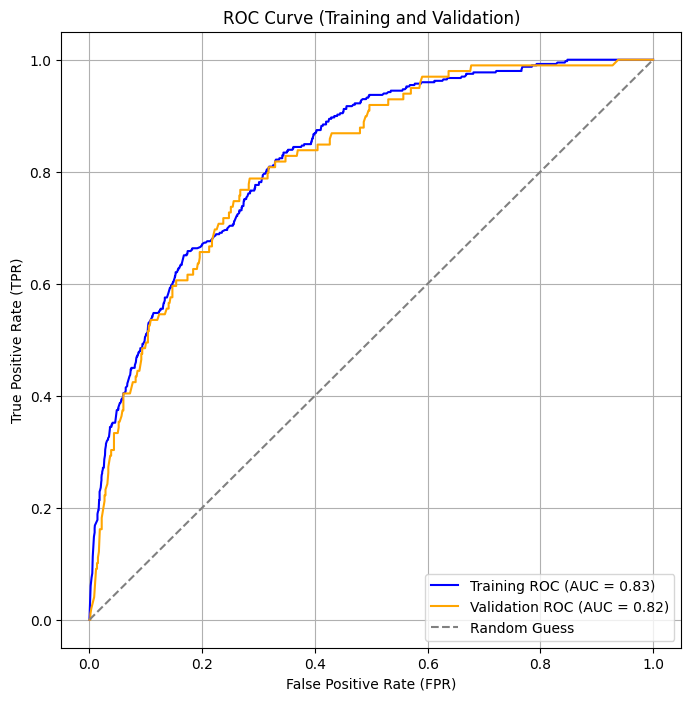

In [517]:
from sklearn.metrics import roc_curve, roc_auc_score

y_tr_score = model.predict_proba(x_tr)[:, 1]
y_va_score = model.predict_proba(x_va)[:, 1]

fpr_tr, tpr_tr, _ = roc_curve(y_tr, y_tr_score)
auc_tr = roc_auc_score(y_tr, y_tr_score)

fpr_va, tpr_va, _ = roc_curve(y_va, y_va_score)
auc_va = roc_auc_score(y_va, y_va_score)

plt.figure(figsize=(8, 8))
plt.plot(fpr_tr, tpr_tr, label=f'Training ROC (AUC = {auc_tr:.2f})', color='blue')
plt.plot(fpr_va, tpr_va, label=f'Validation ROC (AUC = {auc_va:.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (Training and Validation)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [523]:
y_pred_prob = model.predict_proba(test_df[features])[:, 1]


sub = pd.read_csv('/content/drive/MyDrive/Â•ëÁ¥Ñ‰∫àÊ∏¨ÔºàSIGNATE Cup 2024Ôºâ/Êèê‰æõ„ÉÜ„Çô„Éº„Çø/sample_submit.csv', header=None)
test_ids = sub.iloc[:, 0]

submission = pd.DataFrame({
    'id': test_ids,
    'prob': y_pred_prob
})

submission_name = "prodtaken_submission1"

submission.to_csv(f'{submission_name}.csv', index=False)
submission.head()

id      prob
0  3489  0.128237
1  3490  0.134208
2  3491  0.181981
3  3492  0.154462
4  3493  0.184442